## Female HoH

We use the [SECC 2011 data](https://github.com/in-rolls/secc) from 14 states to estimate the percentage of households that have a female Head of Household (HoH), the variation in percentage of female HoH by last name (see [here](https://github.com/appeler/outkast) for how we deduce last names) and by SC/ST/Other. We also estimate the average age of female and male HoH.


About 11.7% of the households have a female HoH. Expectedly, the age of female HoH (~ 54.1 years) is generally higher than a male HoH (~ 47.3 years). The percentage of female HoH doesn't vary much by SC/ST/Other but varies widely across last names, with the 10th percentile being 2% and the 90th percentile being 17.6%.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/opt/data/secc/v2/secc_state_ln_sex_social_cat_birthyear_recode.csv.gz')
df

,state,gender,social_cat,birth_year,last_name
0,0,m,t,1979,mai
1,0,m,t,1986,tega
2,0,m,t,1954,tega
3,0,m,t,1964,tega
4,0,m,t,1984,mai
...,...,...,...,...,...
140194816,18,m,c,1976,maity
140194817,18,m,c,1974,maity
140194818,18,m,c,1969,maity
140194819,18,m,o,1949,mahapatra


### Filter Data

Drop rows where there is no last name, where last name has non alphabetical characters, last name is less than 2 characters. 

**Note:** We limit inference of female HoH by last name to last names shared by at least 1000 households

In [3]:
df.dropna(subset=['last_name'], inplace=True)
df

,state,gender,social_cat,birth_year,last_name
0,0,m,t,1979,mai
1,0,m,t,1986,tega
2,0,m,t,1954,tega
3,0,m,t,1964,tega
4,0,m,t,1984,mai
...,...,...,...,...,...
140194816,18,m,c,1976,maity
140194817,18,m,c,1974,maity
140194818,18,m,c,1969,maity
140194819,18,m,o,1949,mahapatra


In [4]:
df.drop(df[~df.last_name.str.isalpha()].index, inplace=True)
df

,state,gender,social_cat,birth_year,last_name
0,0,m,t,1979,mai
1,0,m,t,1986,tega
2,0,m,t,1954,tega
3,0,m,t,1964,tega
4,0,m,t,1984,mai
...,...,...,...,...,...
140194816,18,m,c,1976,maity
140194817,18,m,c,1974,maity
140194818,18,m,c,1969,maity
140194819,18,m,o,1949,mahapatra


In [5]:
df.drop(df[df.last_name.str.len() < 2].index, inplace=True)
df

,state,gender,social_cat,birth_year,last_name
0,0,m,t,1979,mai
1,0,m,t,1986,tega
2,0,m,t,1954,tega
3,0,m,t,1964,tega
4,0,m,t,1984,mai
...,...,...,...,...,...
140194816,18,m,c,1976,maity
140194817,18,m,c,1974,maity
140194818,18,m,c,1969,maity
140194819,18,m,o,1949,mahapatra


Take out people born before 1900

In [6]:
df.drop(df[df.birth_year < 1900].index, inplace=True)
df

,state,gender,social_cat,birth_year,last_name
0,0,m,t,1979,mai
1,0,m,t,1986,tega
2,0,m,t,1954,tega
3,0,m,t,1964,tega
4,0,m,t,1984,mai
...,...,...,...,...,...
140194816,18,m,c,1976,maity
140194817,18,m,c,1974,maity
140194818,18,m,c,1969,maity
140194819,18,m,o,1949,mahapatra


Take out people w/ age < 18

In [7]:
df.drop(df[df.birth_year > 1993].index, inplace=True)
df

,state,gender,social_cat,birth_year,last_name
0,0,m,t,1979,mai
1,0,m,t,1986,tega
2,0,m,t,1954,tega
3,0,m,t,1964,tega
4,0,m,t,1984,mai
...,...,...,...,...,...
140194816,18,m,c,1976,maity
140194817,18,m,c,1974,maity
140194818,18,m,c,1969,maity
140194819,18,m,o,1949,mahapatra


Keep last names that are in at least 1000 households

In [8]:
%%time
adf = df[df['last_name'].groupby(df['last_name']).transform('size')>1000]
adf

CPU times: user 27.3 s, sys: 1.78 s, total: 29.1 s
Wall time: 33.2 s


,state,gender,social_cat,birth_year,last_name
640,0,m,t,1960,kri
641,0,m,t,1955,kri
642,0,m,t,1961,kri
643,0,m,t,1940,kri
644,0,m,t,1940,kri
...,...,...,...,...,...
140194816,18,m,c,1976,maity
140194817,18,m,c,1974,maity
140194818,18,m,c,1969,maity
140194819,18,m,o,1949,mahapatra


In [9]:
adf['last_name'].groupby(adf['last_name']).size()

last_name
aade         6270
aadivasi     6973
aadiwasi     6672
aaher        1554
aahir        1898
            ...  
zala        35140
zalte        1207
zapadiya     1390
zende        1654
zore         1975
Name: last_name, Length: 6636, dtype: int64

### Percentage of households led by a man

In [10]:
df['gender'].value_counts(normalize=True).mul(100)

m    88.274456
f    11.725544
Name: gender, dtype: float64

### Average Age of Female/Male HoH

In [11]:
df['age'] = 2011 - df.birth_year
df.groupby(['gender']).agg({'age': 'mean'})

,age
gender,
f,54.127103
m,47.258642


### Percentage of Female HoH by SC/ST/Other

In [12]:
pdf_by_cat = df.groupby(['social_cat'])['gender'].value_counts(normalize=True).mul(100).unstack()
pdf_by_cat

gender,f,m
social_cat,,
c,11.933681,88.066319
o,11.625150,88.374850
t,12.050346,87.949654


In [13]:
adf['gender'].value_counts(normalize=True).mul(100)

m    88.612889
f    11.387111
Name: gender, dtype: float64

In [14]:
pdf_by_ln = adf.groupby(['last_name'])['gender'].value_counts(normalize=True).mul(100).unstack()
pdf_by_ln

gender,f,m
last_name,,
aade,8.389155,91.610845
aadivasi,7.141833,92.858167
aadiwasi,8.723022,91.276978
aaher,9.202059,90.797941
aahir,9.957850,90.042150
...,...,...
zala,9.194650,90.805350
zalte,11.350456,88.649544
zapadiya,4.532374,95.467626


In [15]:
pdf_by_ln.quantile([0.1, 0.9])

gender,f,m
0.1,1.994752,82.398663
0.9,17.605384,98.012484


In [16]:
pdf_by_ln[pdf_by_ln.f > 15].head()

gender,f,m
last_name,,
aara,83.381924,16.618076
aarumugam,17.109748,82.890252
aasari,15.052889,84.947111
abraham,17.022635,82.977365
acharjee,18.019625,81.980375


### Age Distribution of Female and Male HoH

In [17]:
df[df.gender=='f'].age.quantile([0.1, 0.9])

0.1    34.0
0.9    72.0
Name: age, dtype: float64

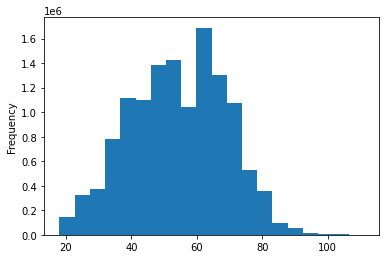

In [18]:
df[df.gender=='f'].age.plot(kind='hist', bins=20)

In [19]:
df[df.gender=='m'].age.quantile([0.1, 0.9])

0.1    30.0
0.9    67.0
Name: age, dtype: float64

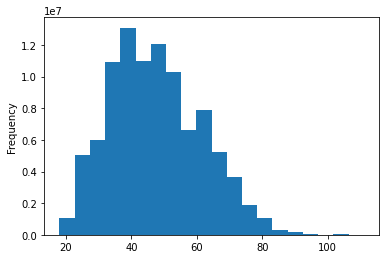

In [20]:
df[df.gender=='m'].age.plot(kind='hist', bins=20)